# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Daniel Lam
- Jacky Dam
- Katherine Lim
- Michael Phung

<a id='research_question'></a>
# Research Question

In the game League of Legends, players select certain characters (champions) to play in team-based matches against an opposing team and try to achieve victory. Given a wide selection of team compositions from past matches and whether or not they won or lost, can we determine a team's probability of winning during the matchmaking process of the game?

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

- Dataset Name: match_history.csv
- Link to the dataset: https://github.com/COGS108/Group024-Fa21/blob/master/match_history.csv
- Number of observations: 

This dataset is past player data that we extracted using Cassiopeia (https://github.com/meraki-analytics/cassiopeia). It contains information regarding the teams that played each other in past matches as well as the end result of that match. 

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

In [1]:
# Talk about how the data is from a specific range of ranked players (i.e. diamond high elo)

# Setup

In [2]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import random

# Data Cleaning

To understand the data cleaning process, we first need to understand which columns we need from the dataset. We will take a look at what the data looks like, and look for any interesting features.

In [3]:
# Read the CSV file for the player match history. Display a match with all the players.
matches = pd.read_csv("match_history.csv")
matches.head(20)

,match_id,duration,summoner_name,side,team_position,summoner_level,win,champion,kills,deaths,assists,damage_to_turrets,gold_earned,turret_takedowns,vision_score,minions_killed,first_blood,first_tower
0,4118898873,0:00:02.072000,Clemency5th,blue,top_lane,195,True,Lillia,7,5,9,1718,13627,3,26,245,False,False
1,4118898873,0:00:02.072000,PikaGirl,blue,jungle,45,True,Hecarim,7,3,18,0,15672,0,30,59,False,False
2,4118898873,0:00:02.072000,RSH,blue,mid_lane,242,True,Garen,7,6,10,6265,13097,3,29,208,False,False
3,4118898873,0:00:02.072000,The Doggo,blue,bot_lane,750,True,Vayne,7,4,6,4925,14166,3,45,250,True,False
4,4118898873,0:00:02.072000,μREDACTEDμ,blue,utility,96,True,Rakan,3,2,18,983,9170,2,64,36,False,False
5,4118898873,0:00:02.072000,LTQ JBD,red,top_lane,589,False,Gangplank,5,7,5,4040,17191,3,29,270,False,False
6,4118898873,0:00:02.072000,ready to sink,red,jungle,360,False,Graves,3,4,12,1694,15248,2,43,71,False,True
7,4118898873,0:00:02.072000,smart kevin,red,mid_lane,589,False,Yasuo,6,5,5,858,14175,0,23,275,False,False
8,4118898873,0:00:02.072000,MeloMance,red,bot_lane,44,False,Jhin,5,6,9,3185,13626,3,23,188,False,False
9,4118898873,0:00:02.072000,Your Cut,red,utility,900,False,Pyke,1,9,9,0,8760,0,121,36,False,False


In [4]:
# Shape of the data set.
matches.shape

(123000, 18)

In [5]:
# Get descriptive statistics for the different variables.
matches.describe()

,match_id,summoner_level,kills,deaths,assists,damage_to_turrets,gold_earned,turret_takedowns,vision_score,minions_killed
count,1.230000e+05,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000,123000.000000
mean,4.107462e+09,279.115065,5.740943,5.758602,8.141764,2655.856463,10712.291447,1.985951,26.692886,112.918740
std,6.098136e+07,183.667557,4.422148,3.132728,5.708500,3131.694091,3633.290317,1.990293,19.935407,77.491708
min,1.162779e+09,31.000000,0.000000,0.000000,0.000000,0.000000,668.000000,0.000000,0.000000,0.000000
25%,4.104098e+09,113.000000,2.000000,3.000000,4.000000,388.000000,8102.000000,0.000000,14.000000,33.000000
50%,4.113323e+09,259.000000,5.000000,6.000000,7.000000,1605.000000,10438.000000,1.000000,21.000000,125.000000
75%,4.117678e+09,408.000000,8.000000,8.000000,11.000000,3900.250000,13072.000000,3.000000,33.000000,175.000000
max,4.119590e+09,1972.000000,32.000000,22.000000,50.000000,48932.000000,28757.000000,11.000000,209.000000,399.000000


In [6]:
# Column data types.
matches.dtypes

match_id              int64
duration             object
summoner_name        object
side                 object
team_position        object
summoner_level        int64
win                    bool
champion             object
kills                 int64
deaths                int64
assists               int64
damage_to_turrets     int64
gold_earned           int64
turret_takedowns      int64
vision_score          int64
minions_killed        int64
first_blood            bool
first_tower            bool
dtype: object

In [7]:
# list the column values
list(matches)

['match_id',
 'duration',
 'summoner_name',
 'side',
 'team_position',
 'summoner_level',
 'win',
 'champion',
 'kills',
 'deaths',
 'assists',
 'damage_to_turrets',
 'gold_earned',
 'turret_takedowns',
 'vision_score',
 'minions_killed',
 'first_blood',
 'first_tower']

# Interpreting the Data

From the information above, the data set contains the match history of 8380 players, and each match_id contains 10 players meaning that there is a total of 838 games. There are 18 variables for every player...

Looking at the above columns, there are a few variables that are necessary in determining the probability of winning for a given team composition. The following are the variables that we thought would prove helpful:  
- match_id: unique number that correlates to a single match or game.
- champion: the character that the player chose.
- win: the result of a player during a specific match.
- team_position: the 'role' of the player during the match (their position in the match).
- side: the team of each player (red or blue).
- kills/deaths/assists: the score of the player during the specific match (aka KDA), statistic that shows how well the player performed during the match.

We decided to remove the following columns:
- duration: the total game duration.
- summoner_name: unique name of the player.
- summoner_level: the overall level of the given player (does not relate to the match).
- damage_to_turrets: the amount of damage done to the enemy base (typically does not affect win/loss).
- turret_takedowns: the number of turrets a player destroyed (was the last source of damage to the tower in destroying it).
- gold_earned: amount of gold earned by the player during the match by killing minions, destorying turrets, or securing objectives.
- vision_score: vision score is given based on how many wards they placed down or enemy wards that they destroyed. a ward is an item used by players to reveal the locations of the enemy team.
- minions_killed: also known as creep score, a number that determines how many neutral/enemy minions were neutralized by the player. killing minions award the player with gold.
- first_blood: a statistic awarded to the player who was the first to takedown an enemy player.
- first_tower: a statistic awarded to the player who was the first to takedown an enemy turret.

In [8]:
# Remove the unwanted columns from the dataset.
matches.drop(['summoner_name', "duration", 'summoner_level', 'damage_to_turrets', 'gold_earned', 'vision_score', 
              'minions_killed', 'first_blood', 'first_tower', 'turret_takedowns'], axis = 'columns', 
              inplace = True)

In [9]:
# Display the dataset with only the columns we want to work with.
matches.head(10)

,match_id,side,team_position,win,champion,kills,deaths,assists
0,4118898873,blue,top_lane,True,Lillia,7,5,9
1,4118898873,blue,jungle,True,Hecarim,7,3,18
2,4118898873,blue,mid_lane,True,Garen,7,6,10
3,4118898873,blue,bot_lane,True,Vayne,7,4,6
4,4118898873,blue,utility,True,Rakan,3,2,18
5,4118898873,red,top_lane,False,Gangplank,5,7,5
6,4118898873,red,jungle,False,Graves,3,4,12
7,4118898873,red,mid_lane,False,Yasuo,6,5,5
8,4118898873,red,bot_lane,False,Jhin,5,6,9
9,4118898873,red,utility,False,Pyke,1,9,9


In [10]:
# Check the shape of our new dataset, and check if there exist any missing entries.
print(matches.shape)
matches.isna().any()

(123000, 8)


match_id         False
side             False
team_position    False
win              False
champion         False
kills            False
deaths           False
assists          False
dtype: bool

Now we want to check whether every match_id only has only 10 players. Any match_id with more than 10 player represents a duplicate match entry which we want to remove. 

In [11]:
# Check if there's any duplicate matches (match_ids w/ more than 10 players)
matches['match_id'].value_counts()

4118898873    720
4118489546    470
4118369503    430
4118434340    430
4118777341    430
             ... 
4030395433      1
4115739824      1
4117946307      1
4117057476      1
4100345588      1
Name: match_id, Length: 8129, dtype: int64

In [12]:
# Drop any duplicate matches that appear more than once
matches = matches.drop_duplicates()

In [13]:
# Show that we removed duplicate matches (match_ids only have 10 players each)
matches['match_id'].value_counts()

4118898873    10
4119454258    10
4118175450    10
4116854036    10
4116879673    10
              ..
4104149188     1
4104661288     1
4103307491     1
4117057476     1
4100345588     1
Name: match_id, Length: 8129, dtype: int64

In [14]:
matches_dict = dict(matches['match_id'].value_counts() == 10)
match_id = []

for i in matches_dict:
    if matches_dict[i] == True:
        match_id.append(i)
        
matches = matches[matches["match_id"].isin(match_id)]
matches['match_id'].value_counts()

4118898873    10
4117017116    10
4100929740    10
4102286314    10
4104657610    10
              ..
4105402652    10
4105472841    10
4105626009    10
4105617816    10
4100421559    10
Name: match_id, Length: 8069, dtype: int64

Now our dataset only contains 762 unique match_ids which all has 10 players each.

# Data Analysis & Results

### Processing the data for our predictive model
We want to parse through every match, derive the blue team composition and red team composition in order to feed our machine learning model.

In [15]:
match_ids = []
blue_comp = [] 
red_comp = []
win_comp = []
lose_comp = []

# After cleaning our data, every 10 iterations represents a unique match with 10 players.
for i in range(0, len(matches), 10):
    blue_temp = []
    red_temp = []
    win_temp = []
    lose_temp = []
    
    # Record the match_id.
    match_ids.append(matches.iloc[i]['match_id'])
    
    # Parse the first 5 players in the match representing the blue team, extract their team composition into an array representing whether they won/lost.
    for j in range(0, 5):
        blue_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
    # Parse the last 5 players in the match representing the red team, extract their team composition into an array representing whether they won/lost.
    for j in range(5, 10):
        red_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
        
    blue_comp.append(blue_temp)
    red_comp.append(red_temp)
    win_comp.append(win_temp)
    lose_comp.append(lose_temp)

# Display the team compositions for the first match
print("Match ID: " + str(match_ids[0]))
print("Red Team Composition: " + str(red_comp[0]))
print("Blue Team Composition: " + str(blue_comp[0]))

Match ID: 4118898873
Red Team Composition: ['Gangplank', 'Graves', 'Yasuo', 'Jhin', 'Pyke']
Blue Team Composition: ['Lillia', 'Hecarim', 'Garen', 'Vayne', 'Rakan']


In [16]:
### Data Analysis & Results (EDA)

In [17]:
# Remove duplicate champions, team_positions which appear more than once.
df = matches[["champion", "team_position"]].drop_duplicates()
df.head()

,champion,team_position
0,Lillia,top_lane
1,Hecarim,jungle
2,Garen,mid_lane
3,Vayne,bot_lane
4,Rakan,utility


In [18]:
# Calculate the number of games won, lost for each champion in their respective role
win_df = matches[matches["win"]==True].groupby(["champion", "team_position"]).count().drop(columns=["match_id", "side", "kills", "deaths", "assists"])
lose_df = matches[matches["win"]==False].groupby(["champion", "team_position"]).count().rename(columns={"win":"lose"}).drop(columns=["match_id", "side", "kills", "deaths", "assists"])

In [19]:
# Merge the number of games won, lost for each champion in their respective role
df = df.merge(win_df, left_on=["champion", "team_position"], right_on=["champion", "team_position"])
df = df.merge(lose_df, left_on=["champion", "team_position"], right_on=["champion", "team_position"])

In [20]:
# Create a column for the total games played for each champion in their respective role
df["games_played"] = df["win"]+df["lose"]

In [21]:
# Calculate the win rate for each champion in their respective role
df["win_rate"] = df["win"]/df["games_played"]

In [22]:
# Sort the data frame by the most picked champions
df = df.sort_values(by="games_played", ascending=False)

In [23]:
# Reset the indicies, and display the data frame.
# The indicies are now ranked by the total number of games played.
df = df.reset_index(drop=True)
df.head()

,champion,team_position,win,lose,games_played,win_rate
0,Jhin,bot_lane,1020,954,1974,0.516717
1,Jinx,bot_lane,856,844,1700,0.503529
2,Caitlyn,bot_lane,789,780,1569,0.502868
3,Ezreal,bot_lane,564,623,1187,0.475147
4,Lulu,utility,602,546,1148,0.524390


Barplots of the win rate for top 10 most popular champion per role.

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

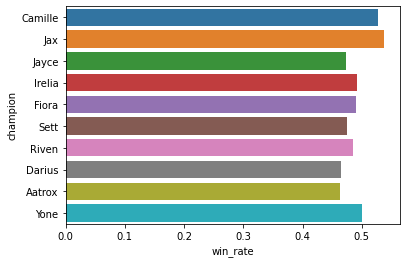

In [24]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="top_lane"][:10])

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

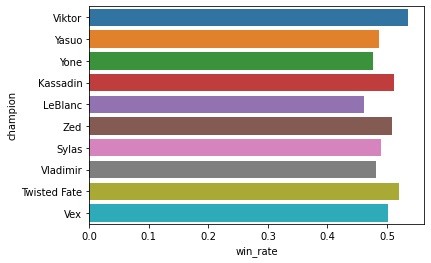

In [25]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="mid_lane"][:10])

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

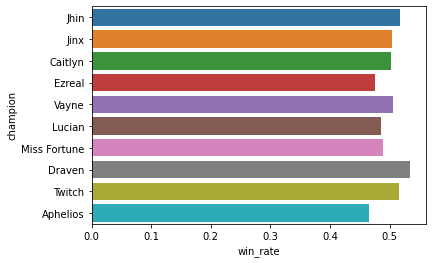

In [26]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="bot_lane"][:10])

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

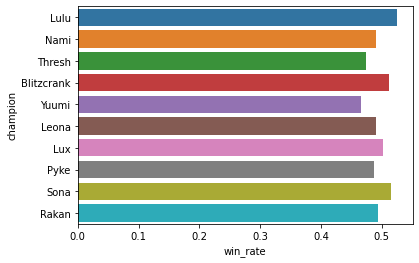

In [27]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="utility"][:10])

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

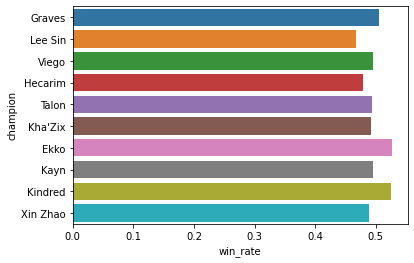

In [28]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="jungle"][:10])

In [29]:
data = [(win_comp[i], True) for i in range(len(match_ids))]
data += [(lose_comp[i], False) for i in range(len(match_ids))]

# data = [(win_comp[i], True) for i in range(int(len(match_ids)*0.2), len(match_ids))]
# data += [(lose_comp[i], False) for i in range(int(len(match_ids)*0.2), len(match_ids))]

# validation = [(win_comp[i], lose_comp[i]) for i in range(int(len(match_ids)*0.2))]

In [30]:
champion_dict = dict(enumerate(np.unique([i[0] for i in data])))
champion_dict = dict((v,k) for k,v in champion_dict.items())

In [31]:
def feat(datum):
    feat = [1]
#     champion = [0]*len(champion_dict)
    for champion_selected in datum[0]:
        champion = [0]*len(champion_dict)
        champion[champion_dict[champion_selected]] = 1
        feat += champion
#     return feat + champion
    return feat

In [32]:
# X = [feat(d) for d in data]
# y = [d[1] for d in data]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [33]:
random.shuffle(data)
X_train = [feat(d) for d in data]
y_train = [d[1] for d in data]

In [34]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", fit_intercept=True, C=1, class_weight="balanced")
model.fit(X_train, y_train)
# predictions = model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, class_weight='balanced')

In [35]:
# sum([predictions[i]==y_test[i] for i in range(len(predictions))])/len(y_test)

In [36]:
# correct = 0
# for i in validation:
#     if model.predict_proba([feat((i[0], True))])[0][1] > model.predict_proba([feat((i[1], False))])[0][1]:
#         correct += 1
# print(correct/len(validation))

In [37]:
# The first part of the array is the probability of losing, the second part is the probability of winning.

In [38]:
team_composition = np.random.randint(len(data)/2)

In [39]:
win_comp[team_composition]

['Camille', 'Viego', 'Ahri', 'Vayne', 'Sona']

In [40]:
lose_comp[team_composition]

["Cho'Gath", 'Kayn', 'Corki', 'Twitch', 'Janna']

In [41]:
troll_comp = ["Bard", "Lee Sin", "Yuumi", "Teemo", "Janna"]

In [42]:
model.predict_proba([feat((win_comp[team_composition], True))])

array([[0.42227994, 0.57772006]])

In [43]:
model.predict_proba([feat((lose_comp[team_composition], False))])

array([[0.34450963, 0.65549037]])

In [44]:
model.predict_proba([feat((troll_comp, "N/A"))])

array([[0.61306525, 0.38693475]])

In [45]:
correct = 0
for i in range(len(win_comp)):
    if model.predict_proba([feat((win_comp[i], True))])[0][1] > model.predict_proba([feat((lose_comp[i], False))])[0][1]:
        correct += 1
print("Training Accuracy: " + str(correct/len(win_comp)))

Training Accuracy: 0.6065187755607881


In [46]:
matches = pd.read_csv("match_history_test.csv")
matches.drop(['summoner_name', "duration", 'summoner_level', 'damage_to_turrets', 'gold_earned', 'vision_score', 
              'minions_killed', 'first_blood', 'first_tower', 'turret_takedowns'], axis = 'columns', 
              inplace = True)
matches = matches.drop_duplicates()
matches_dict = dict(matches['match_id'].value_counts() == 10)
match_id = []

for i in matches_dict:
    if matches_dict[i] == True:
        match_id.append(i)
        
matches = matches[matches["match_id"].isin(match_id)]


match_ids = []
blue_comp = [] 
red_comp = []
win_comp = []
lose_comp = []

# After cleaning our data, every 10 iterations represents a unique match with 10 players.
for i in range(0, len(matches), 10):
    blue_temp = []
    red_temp = []
    win_temp = []
    lose_temp = []
    
    # Record the match_id.
    match_ids.append(matches.iloc[i]['match_id'])
    
    # Parse the first 5 players in the match representing the blue team, extract their team composition into an array representing whether they won/lost.
    for j in range(0, 5):
        blue_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
    # Parse the last 5 players in the match representing the red team, extract their team composition into an array representing whether they won/lost.
    for j in range(5, 10):
        red_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
        
    blue_comp.append(blue_temp)
    red_comp.append(red_temp)
    win_comp.append(win_temp)
    lose_comp.append(lose_temp)

# Display the team compositions for the first match
print("Match ID: " + str(match_ids[0]))
print("Red Team Composition: " + str(red_comp[0]))
print("Blue Team Composition: " + str(blue_comp[0]))

Match ID: 4105292087
Red Team Composition: ['Fiora', 'Evelynn', 'Caitlyn', "Kai'Sa", 'Lulu']
Blue Team Composition: ['Wukong', 'Qiyana', 'Katarina', 'Miss Fortune', 'Zyra']


In [47]:
correct = 0
for i in range(len(win_comp)):
    if model.predict_proba([feat((win_comp[i], True))])[0][1] > model.predict_proba([feat((lose_comp[i], False))])[0][1]:
        correct += 1
print("Test Accuracy: " + str(correct/len(win_comp)))

Test Accuracy: 0.5776173285198556


Include cells that describe the steps in your data analysis.

In [48]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*